<a href="https://colab.research.google.com/github/sayak-coding/Breast-Cancer/blob/main/BREAST_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **id -** ID of the patient
#2. **diagnosis -** The diagnosis of breast tissues (M = malignant, B = benign)
#3. **radius_mean -** Radius of Lobes (mean of distances from center to points on the perimeter)
#4. **texture_mean -** Mean of Surface Texture (standard deviation of gray-scale values)
#5. **perimeter_mean -** Outer Perimeter of Lobes (mean size of the core tumor)
#6. **area_mean -** Mean Area of Lobes ()
#7. **smoothness_mean -** Mean of Smoothness Levels (mean of local variation in radius lengths)
#8. **compactness_mean -** Mean of Compactness (mean of perimeter^2 / area - 1.0)
#9. **concavity_mean -** Mean of Concavity (mean of severity of concave portions of the contour)
#10. **concave points_mean -** Mean of Cocave Points (mean for number of concave portions of the contour)
#11. **symmetry_mean -** Mean of Symmetry ()
#12. **fractal_dimension_mean -** Mean of Fractal Dimension (mean for "coastline approximation" - 1)
#13. **radius_se -** SE of Radius (standard error for the mean of distances from center to points on the perimeter)
#14. **texture_se -** SE of Texture (standard error for standard deviation of gray-scale values)
#15. **perimeter_se -** Perimeter of SE ()
#16. **area_se -** Area of SE ()
#17. **smoothness_se -** SE of Smoothness (standard error for local variation in radius lengths)
#18. **compactness_se -** SE of compactness (standard error for perimeter^2 / area - 1.0)
#19. **concavity_se -** SE of concavity (standard error for severity of concave portions of the contour)
#20. **concave points_se -** SE of concave points (standard error for number of concave portions of the contour)
#21. **symmetry_se -** SE of symmetry ()
#22. **fractal_dimension_se -** SE of Fractal Dimension (standard error for "coastline approximation" - 1)
#23. **radius_worst -** Worst Radius ("worst" or largest mean value for mean of distances from center to points on the perimeter)
#24. **texture_worst -** Worst Texture ("worst" or largest mean value for standard deviation of gray-scale values)
#25. **perimeter_worst -** Worst Permimeter ()
#26. **area_worst -** Worst Area ()
#27. **smoothness_worst -** Worst Smoothness ("worst" or largest mean value for local variation in radius lengths)
#28. **compactness_worst -** Worse Compactness ("worst" or largest mean value for perimeter^2 / area - 1.0)
#29. **concavity_worst -** Worst Concavity ("worst" or largest mean value for severity of concave portions of the contour)
#30. **concave points_worst -** Worst Concave Points ("worst" or largest mean value for number of concave portions of the contour)
#31. **symmetry_worst -** Worst Symmetry ()
#32. **fractal_dimension_worst -** Worst Fractal Dimension ("worst" or largest mean value for "coastline approximation" - 1)

#Install Required Modules

In [ ]:
pip install catboost # install catboost module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:

pip install xplotter

#Import Required Modules

In [ ]:

#Data Analysis
import pandas as pd # for data frame
import numpy as np # for linear algebra

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# plotly can visualize the graph more interactively
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler # scaled data for except normalize features
from sklearn.model_selection import train_test_split # for spliting train and test data set
from sklearn.preprocessing import StandardScaler # scaled data for normalized feautures
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest # Select features according to the k highest scores
from sklearn.feature_selection import SelectFromModel # Meta-transformer for selecting features based on importance weights
from sklearn.model_selection import train_test_split # plit arrays or matrices into random train and test subsets
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder # Label encoding converts the data in machine-readable form, but it assigns a unique number

#Machine Learning
from sklearn.naive_bayes import GaussianNB # gaussian naive classifier
from sklearn.tree import DecisionTreeClassifier # decision tree calssifier
from sklearn.neighbors import KNeighborsClassifier # k nearest calssifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import model_selection # Split arrays or matrices into random train and test subsets
from sklearn.utils import class_weight # Estimate class weights for unbalanced datasets
from xgboost import XGBClassifier # xgboost classifier
from sklearn.ensemble import AdaBoostClassifier # adaboost classifier
from sklearn.ensemble import GradientBoostingClassifier # gradientboosting classifier
import lightgbm as lgb # lightgbm classifier
import xgboost as xgb # xgb classifier
from catboost import CatBoostClassifier # catboost classifier
from sklearn import svm as SVC

#Evaluating algorithms
from sklearn.model_selection import GridSearchCV # grid search cv
from sklearn.model_selection import RandomizedSearchCV # randomized search cv
# from skopt import BayesSearchCV # bayesian search cv
# from skopt.space import Real, Categorical, Integer # in bayes search take real, integer, and categorical variable
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,  f1_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#Evaluating metrics
from sklearn.model_selection import KFold # for k consecutive folds
from sklearn.model_selection import cross_val_score # for cross validation score
from sklearn.metrics import confusion_matrix, accuracy_score # for confusion matrix and accuracy score
from sklearn.metrics import classification_report # for showing main classification metrics
# from sklearn.metrics import plot_roc_curve, plot_confusion_matrix # for plot roc_auc curve and confusion matrix
from sklearn.metrics import precision_score # for calculate precision score
from sklearn.metrics import recall_score # for calculate recall score
from sklearn.metrics import f1_score # for calculate f1 score
from sklearn.metrics import roc_auc_score # for calculate roc_auc score
from sklearn.metrics import roc_curve # for show roc curve
from sklearn.metrics import auc # for determine auc on roc curve

#Warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#load the data set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/breast-cancer.csv")

In [ ]:
df.head() #showing tp 5 rows of the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape #shape of the data set

(569, 32)

In [ ]:
df.info() #data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum() # count of null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df = df.drop(['id'], axis=1) #drop the colum "ID", as the value of the column is all unique

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df['diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'}, inplace=True) #Change the data of the diagnosis column

In [ ]:
# df.head()

In [ ]:
diagnosis_category = df['diagnosis'].value_counts().to_frame().reset_index().rename(columns={'index':'Type', 'type':'Count'})
diagnosis_category # show the content category data

,Type,diagnosis
0,Benign,357
1,Malignant,212


In [ ]:
color_list = ["#8F00FF", "#FEDE00"] # set the colors for the visualization

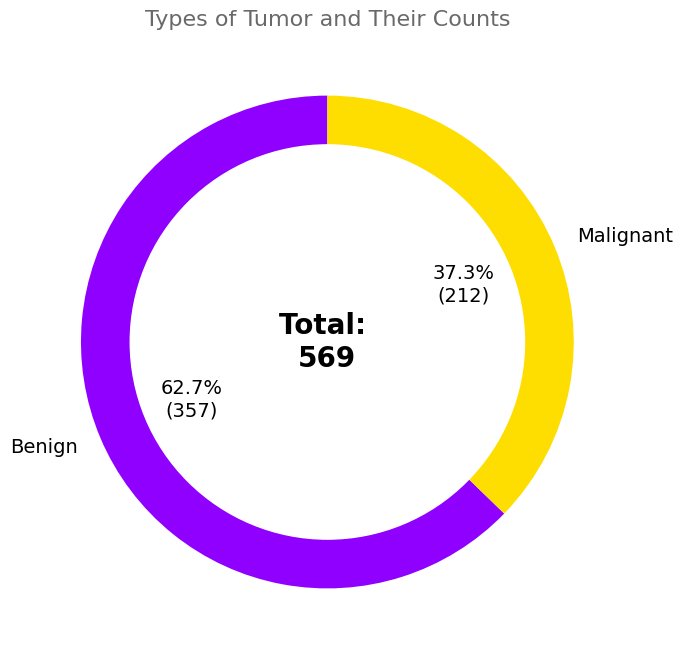

In [ ]:
# plot donut chart from xplotter

plot_donut_chart(df=df, col='diagnosis', colors=color_list, title='Types of Tumor and Their Counts')

In [ ]:
# df['diagnosis'] = df['diagnosis'].map({'Malignant': 1, 'Benign': 0})
# df[['diagnosis']]

In [ ]:
#make a list with the names of the columns
cols_name = list(df.columns)
cols_name

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

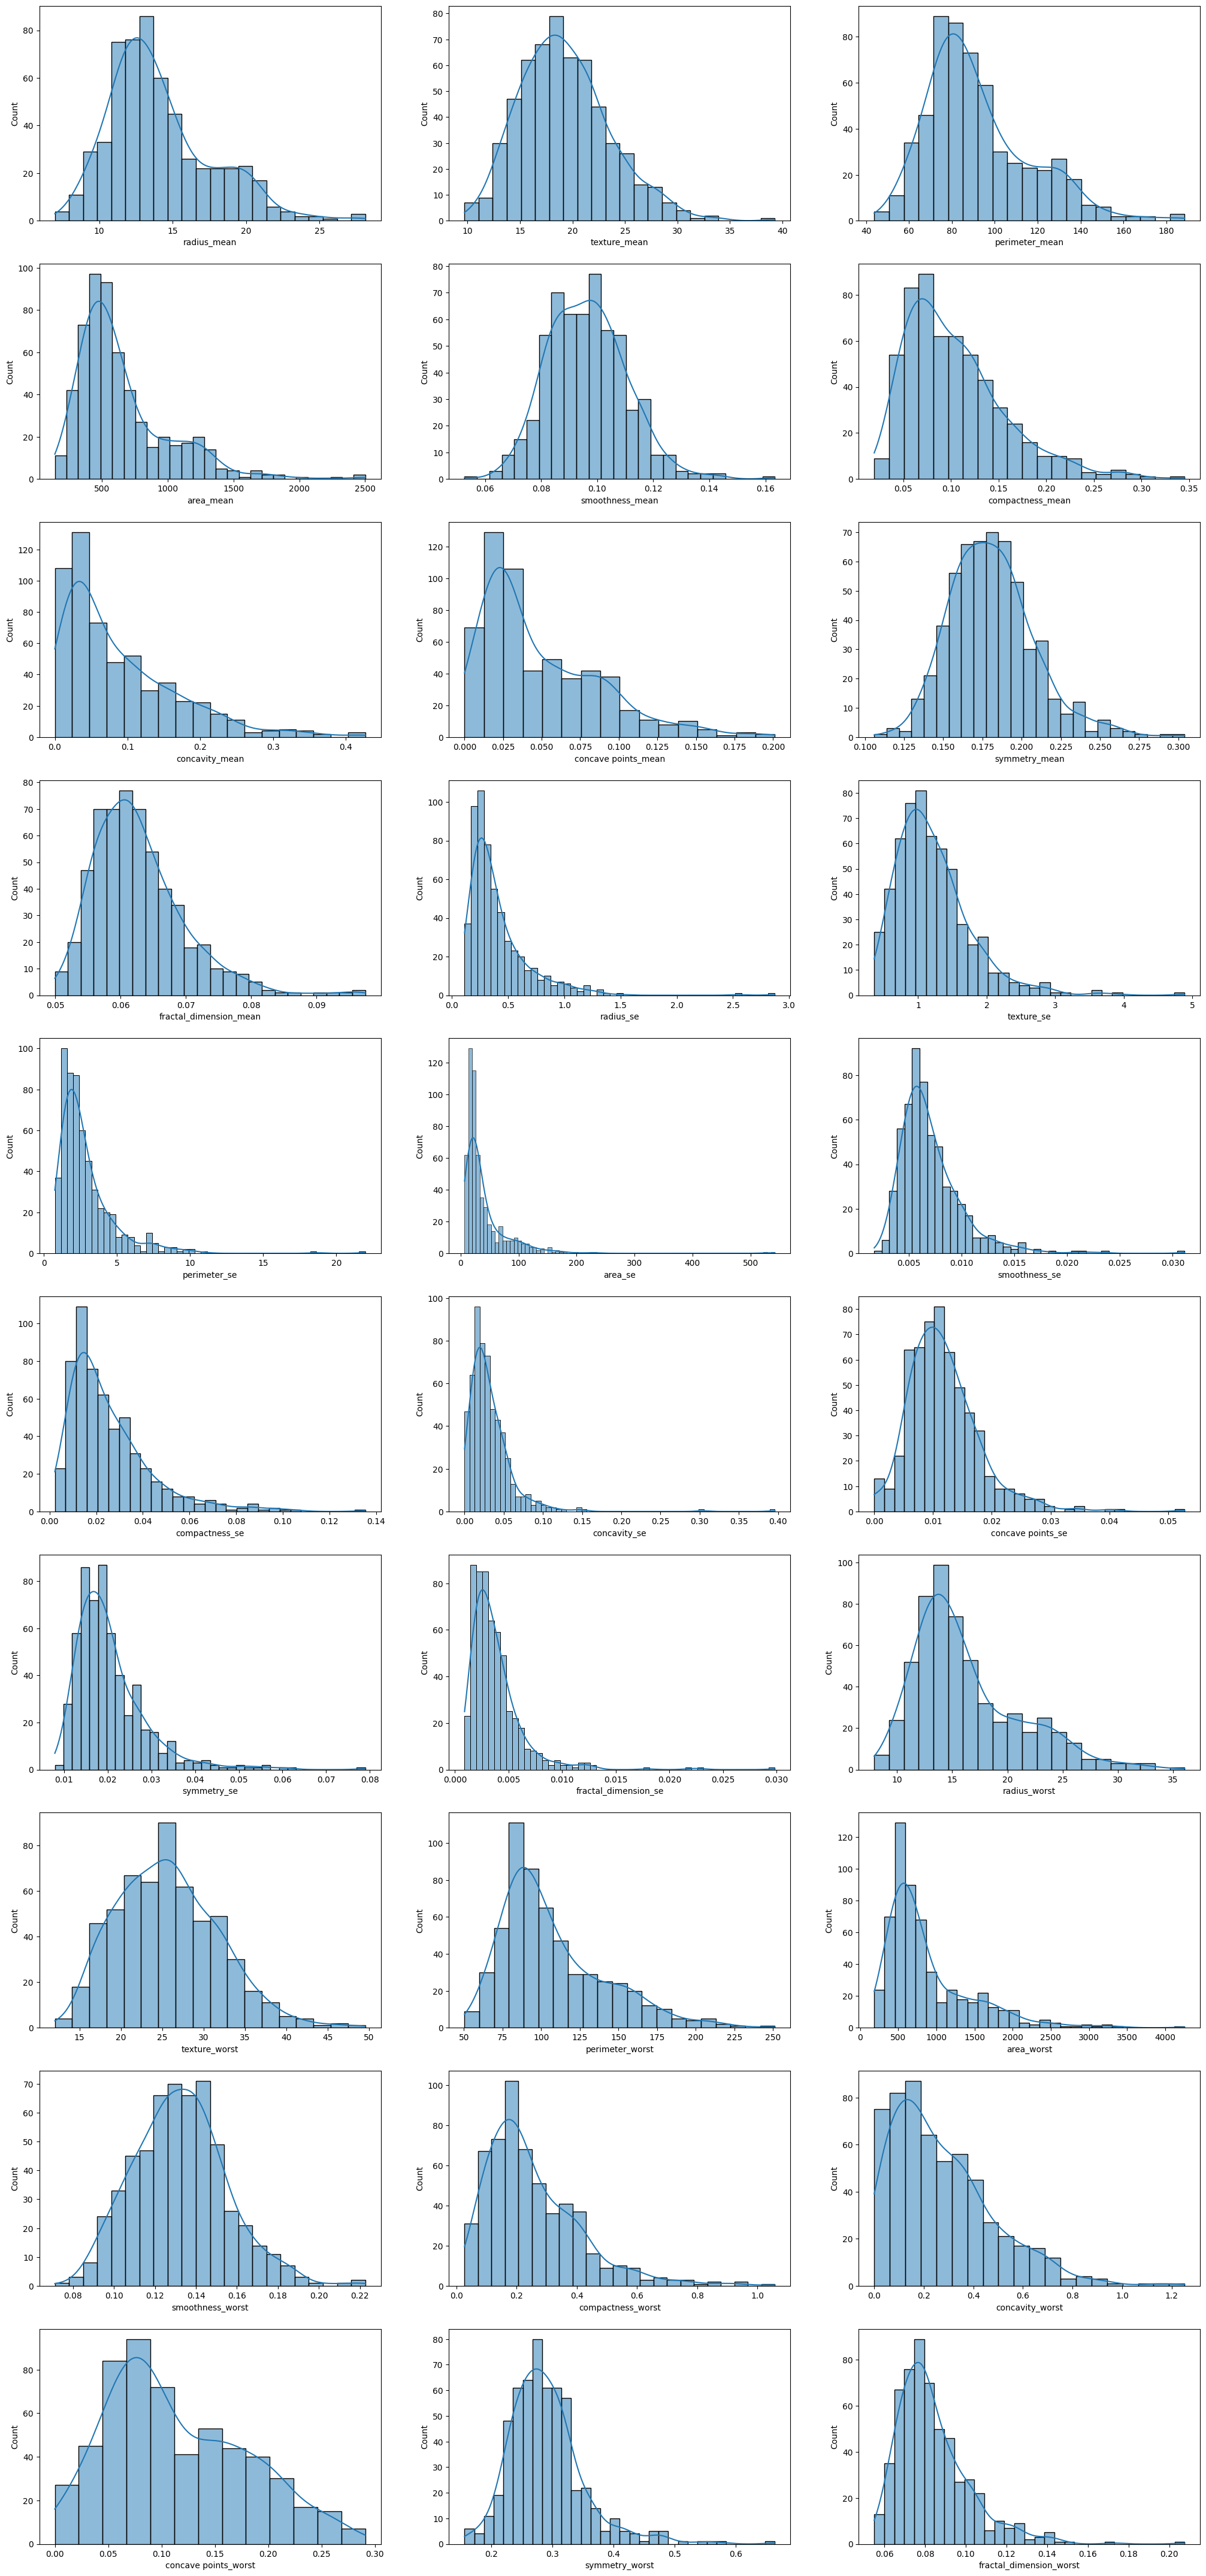

In [ ]:
# create a histogram with KDE to see the distribution of the data of the particular column
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.histplot(df[cols_name[i]], kde = True)
    # sns.kdeplot(df[cols_name[i]], color='red')
plt.show()

# here we see that some distribution has skewness. So there might be some outliers in that particular column.

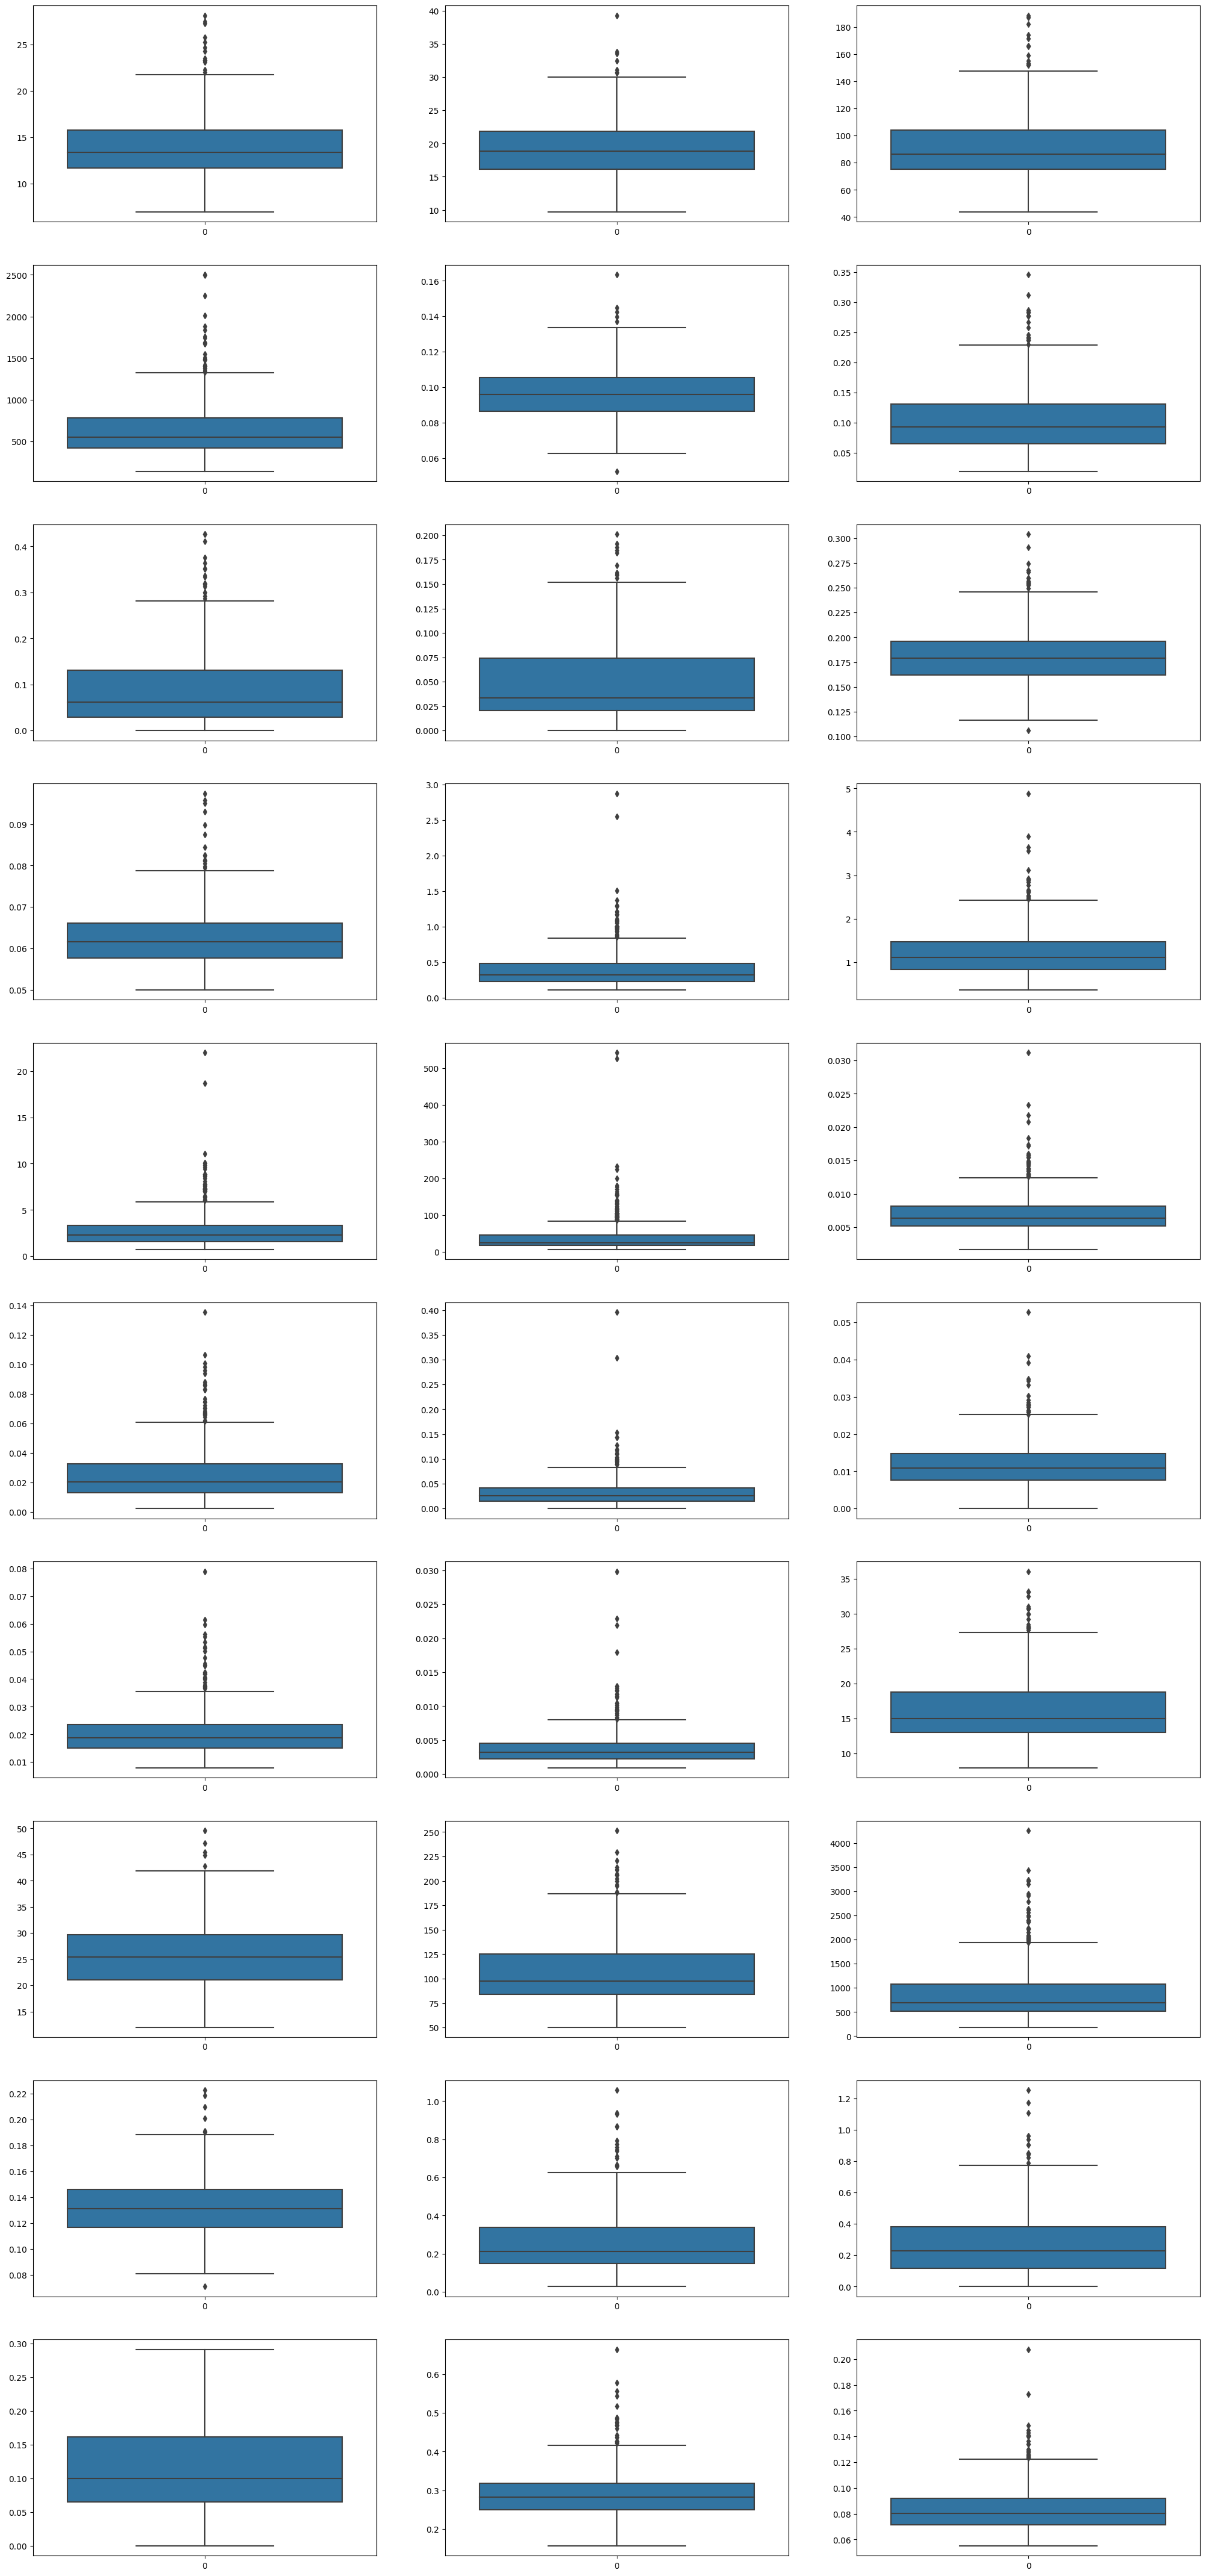

In [ ]:
# we will check outliers with boxplot
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.boxplot(df[cols_name[i]])
plt.show()

# Yes there are outliers

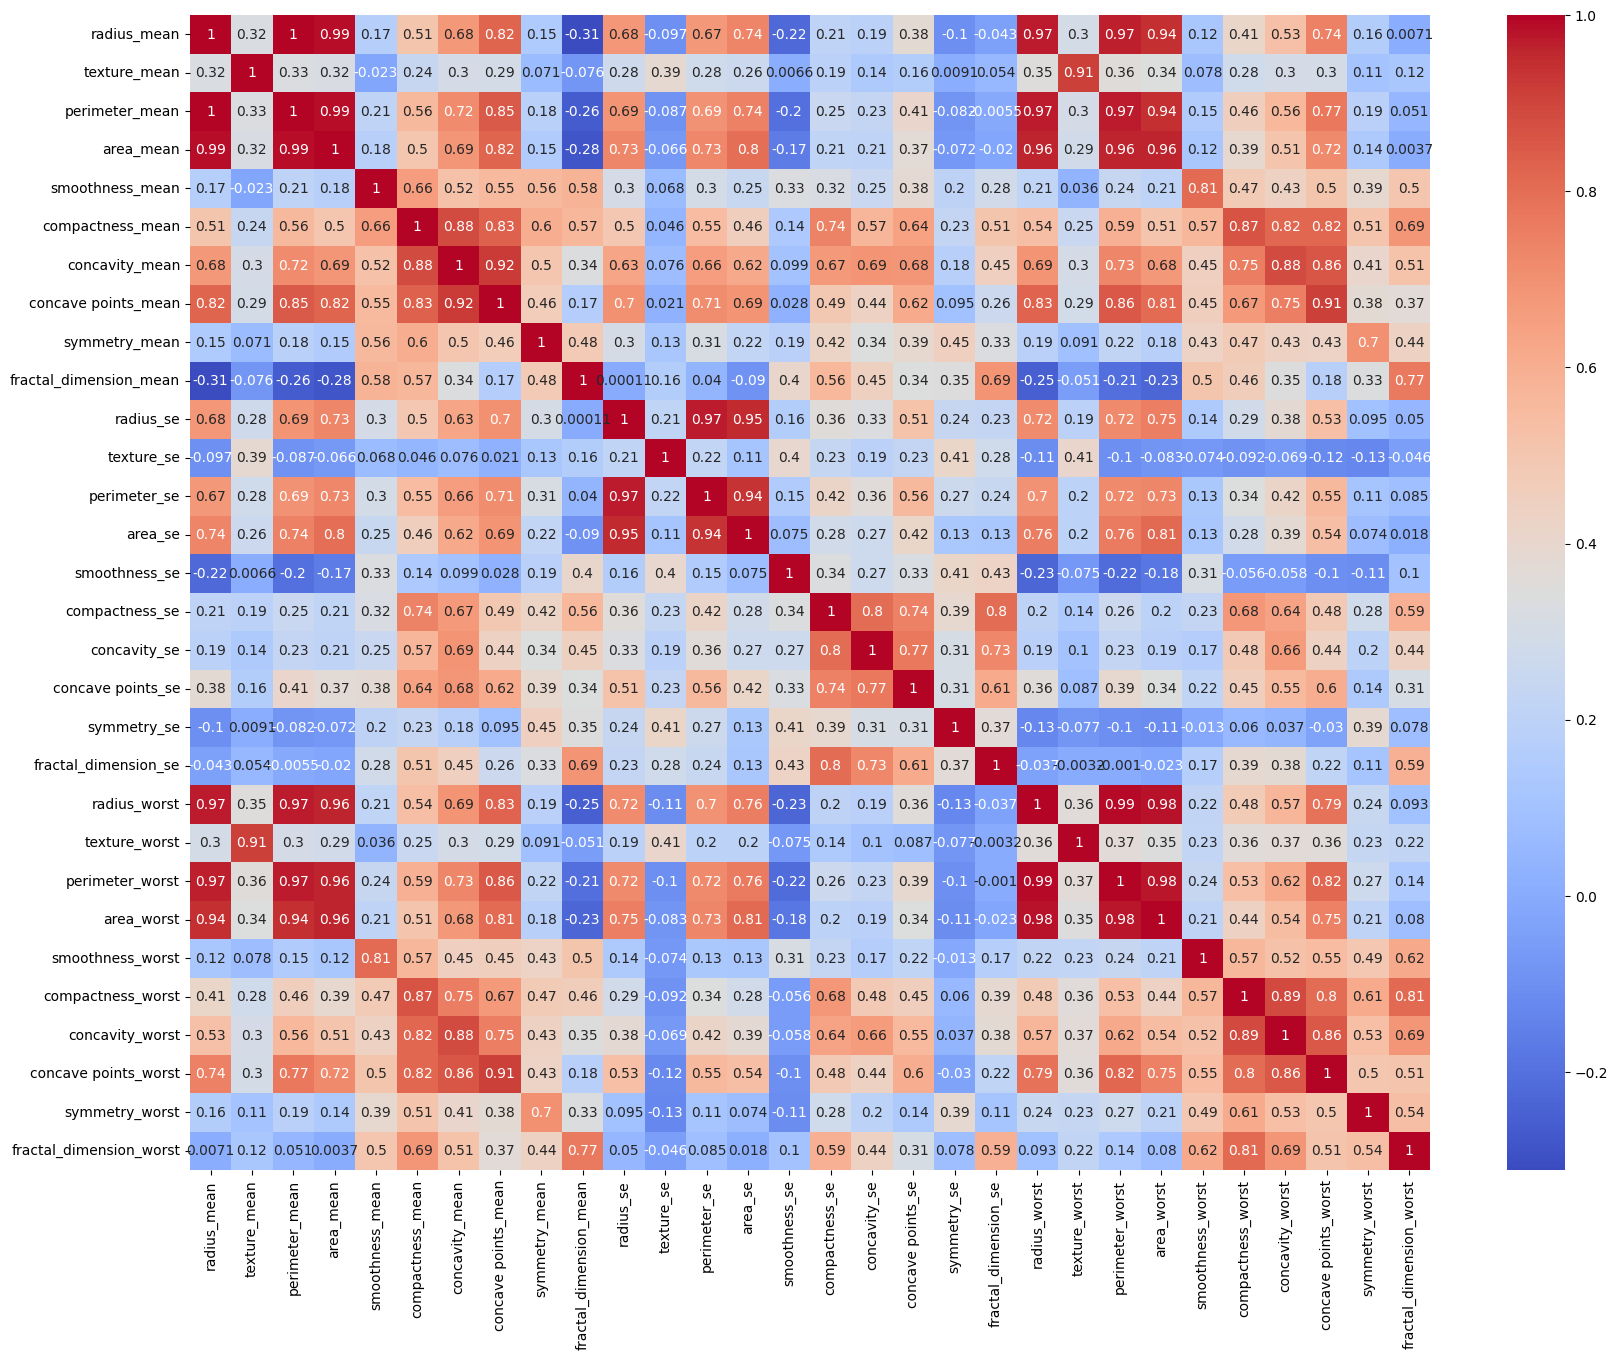

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap="coolwarm", annot= True) # check the correlation among the all features
plt.show()

#We print the name of the columns, which have co-relation with another column

In [ ]:
corr_matrix = df[cols_name[1:]].corr()
# mask = corr_matrix >= 0.9
# mask

In [ ]:
# we make the list of the columns wich have co relation of more than 90% with the another column
corr_pairs = []
for column1 in cols_name[1:]:
    for column2 in cols_name[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in corr_pairs and pair[::-1] not in corr_pairs:
                corr_pairs.append(pair)

corr_pairs

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#eliminate the columns that are highly correlated based on the correlation of the column with the target data.
cols = list(set([col for i in corr_pairs for col in i]))
cols_acc = {}
for column in cols:
    X = df[column]
    y = df["diagnosis"]
    model = LogisticRegression()
    model.fit(X[:250].values.reshape(-1, 1), y[:250])
    accuracy = accuracy_score(y[250:], model.predict(X[250:].values.reshape(-1, 1)))
    cols_acc[column] = accuracy
cols_acc

{'concave points_worst': 0.9153605015673981,
 'perimeter_se': 0.8463949843260188,
 'area_worst': 0.9059561128526645,
 'concavity_mean': 0.9216300940438872,
 'area_mean': 0.8714733542319749,
 'radius_mean': 0.8714733542319749,
 'concave points_mean': 0.9373040752351097,
 'texture_worst': 0.7053291536050157,
 'radius_worst': 0.9059561128526645,
 'area_se': 0.9153605015673981,
 'perimeter_worst': 0.9153605015673981,
 'radius_se': 0.8557993730407524,
 'texture_mean': 0.7272727272727273,
 'perimeter_mean': 0.8934169278996865}

In [ ]:
#- We will keep only columns that have corr>=0.7 with 'diagnosis' column
imp_cols = []
for col in corr_pairs:
    scores = [cols_acc[col[0]], cols_acc[col[1]]]
    req_col = col[scores.index(max(scores))]
    if req_col not in imp_cols:
        imp_cols.append(req_col)
imp_cols

['perimeter_mean',
 'radius_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_mean',
 'concave points_mean',
 'radius_se',
 'area_se']

In [ ]:
for col in cols:
    if col not in imp_cols:
        df.drop(columns=col, inplace = True)
df.shape

(569, 26)

In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) #map the data into 0 and 1

In [ ]:
# set the dependent and independent coloumn
X = df[df.columns[1:]]
y = df['diagnosis']

In [ ]:
# dealing with outliers
def handle_outlier(df):
        data_copy = df.copy()
        data = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:
                    df[col][i] = upper_bound[col]


        for col in df.columns:
            data_copy[col] = df[col]

        return(data_copy)

X = handle_outlier(X)

<ipython-input-68-aa5e8c87a78d>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-aa5e8c87a78d>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# divide the data set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)

In [ ]:
#Since we don't have much data available, We can only Upsample the data
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 286, 1: 286})


In [ ]:
lr_clf = LogisticRegression(solver='saga', max_iter=5000) # setting classifier for logistic regression
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme
# if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss
# if the ‘multi_class’ option is set to ‘multinomial’.
# (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

knns_clf = KNeighborsClassifier() # setting classifier for K- nearest neighbourhood

# svm_clf = SVC()

dt_clf = DecisionTreeClassifier() # setting classifier for decision tree classifier

rf_clf = RandomForestClassifier() # setting classifier for random forest classifier

ada_clf = AdaBoostClassifier() # setting classifier for adaboost classifier

gb_clf = GradientBoostingClassifier() # setting classifier for gradient boosting classifier

lgbm_clf = lgb.LGBMClassifier() # setting classifier for light gradient boosting method classifier

xgb_clf = xgb.XGBClassifier() # setting classifier for xtreme gradient boosting classifier

cb_clf = CatBoostClassifier() # setting classifier for catboost classifier

gnb_clf = GaussianNB() # setting classifier for gaussian naive bayes classifier

In [ ]:
# parameters for the classifier model
# parameter for logistic regression
lr_params = {'C':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],'penalty':['l1', 'l2']}  #lasso and ridge regression

# parameter for k-nearest neighbourhood
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

#svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

# parameter for decision tree
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_leaf': range(1,5)}

#parameter for random forest
rf_params = {'criterion' :['gini', 'entropy'], 'min_samples_leaf': [3, 5], 'min_samples_split': [8,12], 'n_estimators': [50,100]}

# parameter for adaboost classifier
ada_params = {'n_estimators': [50,100], 'learning_rate': [0.01, 0.1, 0.2, 0.5, 1]}

# parameter for gradient boosting classifier
gb_params = {"loss": ["exponential"], "learning_rate": [0.001,0.005,0.01],"max_depth": [4,12], "max_features": ["log2", "sqrt"], "n_estimators": [50,100]}

# parameter for light gradient boosting method
lgbm_params = {'num_leaves':[5,15,25], 'min_child_samples':[5, 10, 15], 'learning_rate':[0.001,0.005,0.01], 'objective': ['binary']}

# parameter for xtreme gradient bosting classifier
xgb_params = {'max_depth': range (2, 10), 'n_estimators': [50,100],'learning_rate': [0.001,0.005,0.01]}

# parameter for catboost classifier
cb_params = {'depth': [4,12], 'learning_rate': [0.001,0.005,0.01],'n_estimators': [50,100], 'loss_function': ['Logloss', 'CrossEntropy']}

# parameter for gaussian naive bayes classifier
gnb_params = {'priors': [None], 'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# creating a function to evaluate grid search cv for each model
def fit_grid(clf, params, cv=5, X_train=X_train, y_train=y_train):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True) #verbose and n_jobs help us see the computation time and score of a cv. Higher the value of verbose, more the information printed out.
    grid.fit(X_train, y_train)
    return grid

# creating a function to evaluate randomized search cv for each model
def fit_randomized(clf, params, cv=5, X_train=X_train, y_train=y_train):
    random = RandomizedSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True)
    random.fit(X_train, y_train)
    return random

# creating a function to evaluate prediction of the model
def make_predictions(model, X_test=X_test):
    return model.predict(X_test)

# creating a function to evaluate best parameter of the model and best score of the model for that parameter
def best_scores(model):
    print(f'The best parameters are: {model.best_params_}')
    print(f'The best score that we got is: {model.best_score_}')
    return None

# creating a function to show all the accuracy metrics for the model
def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, y_pred))
    # print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = KFold(n_splits=cv),scoring = 'roc_auc').mean()))
    return None

In [ ]:
lr_model_grid = fit_grid(lr_clf, lr_params) # fit the model
best_scores(lr_model_grid) # best parameter and score
lr_y_grid_pred = make_predictions(lr_model_grid) # prediction on y set
check_scores(lr_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 26 candidates, totalling 130 fits
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
The best score that we got is: 0.895026697177727
Precision: 1.000
Recall: 0.977
Accuracy: 0.991
F1 Score: 0.988
ROC-AUC Score: 0.988


In [ ]:
lr_model_random = fit_randomized(lr_clf, lr_params) # fit the model
best_scores(lr_model_random) # best parameter and score
lr_y_random_pred = make_predictions(lr_model_random) # prediction on y set
check_scores(lr_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'penalty': 'l2', 'C': 10000.0}
The best score that we got is: 0.895026697177727
Precision: 1.000
Recall: 0.977
Accuracy: 0.991
F1 Score: 0.988
ROC-AUC Score: 0.988


In [ ]:
knns_model_grid = fit_grid(knns_clf, knns_params) # fit the model
best_scores(knns_model_grid) # best parameter and score
knns_y_grid_pred = make_predictions(knns_model_grid) # prediction on y set
check_scores(knns_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The best parameters are: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
The best score that we got is: 0.93534706331045
Precision: 0.867
Recall: 0.907
Accuracy: 0.912
F1 Score: 0.886
ROC-AUC Score: 0.911


In [ ]:
knns_model_random = fit_randomized(knns_clf, knns_params) # fit the model
best_scores(knns_model_grid) # best parameter and score
knns_y_random_pred = make_predictions(knns_model_random) # prediction on y set
check_scores(knns_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
The best score that we got is: 0.93534706331045
Precision: 0.907
Recall: 0.907
Accuracy: 0.930
F1 Score: 0.907
ROC-AUC Score: 0.925


In [ ]:
dt_model_grid = fit_grid(dt_clf, dt_params) # fit the model
best_scores(dt_model_grid) # best parameter and score
dt_y_grid_pred = make_predictions(dt_model_grid) # prediction on y set
check_scores(dt_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 72 candidates, totalling 360 fits
The best parameters are: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
The best score that we got is: 0.9545995423340962
Precision: 0.867
Recall: 0.907
Accuracy: 0.912
F1 Score: 0.886
ROC-AUC Score: 0.911


In [ ]:
dt_model_random = fit_randomized(dt_clf, dt_params) # fit the model
best_scores(dt_model_random) # best parameter and score
dt_y_random_pred = make_predictions(dt_model_random) # prediction on y set
check_scores(dt_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'entropy'}
The best score that we got is: 0.9492601067887108
Precision: 0.860
Recall: 0.860
Accuracy: 0.895
F1 Score: 0.860
ROC-AUC Score: 0.888


In [ ]:
rf_model_grid = fit_grid(rf_clf, rf_params) # fit the model
best_scores(rf_model_grid) # best parameter and score
rf_y_grid_pred = make_predictions(rf_model_grid) # prediction on y set
check_scores(rf_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best parameters are: {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}
The best score that we got is: 0.9633104500381389
Precision: 0.977
Recall: 1.000
Accuracy: 0.991
F1 Score: 0.989
ROC-AUC Score: 0.993


In [ ]:
rf_model_random = fit_randomized(rf_clf, rf_params) # fit the model
best_scores(rf_model_random) # best parameter and score
rf_y_random_pred = make_predictions(rf_model_random) # prediction on y set
check_scores(rf_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'gini'}
The best score that we got is: 0.9633257055682686
Precision: 0.977
Recall: 0.977
Accuracy: 0.982
F1 Score: 0.977
ROC-AUC Score: 0.981


In [ ]:
ada_model_grid = fit_grid(ada_clf, ada_params) # fit the model
best_scores(ada_model_grid) # best parameter and score
ada_y_grid_pred = make_predictions(ada_model_grid) # prediction on y set
check_scores(ada_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'learning_rate': 1, 'n_estimators': 100}
The best score that we got is: 0.9755148741418764
Precision: 0.932
Recall: 0.953
Accuracy: 0.956
F1 Score: 0.943
ROC-AUC Score: 0.956


In [ ]:
ada_model_random = fit_randomized(ada_clf, ada_params) # fit the model
best_scores(ada_model_random) # best parameter and score
ada_y_random_pred = make_predictions(ada_model_random) # prediction on y set
check_scores(ada_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'learning_rate': 1}
The best score that we got is: 0.9755148741418764
Precision: 0.932
Recall: 0.953
Accuracy: 0.956
F1 Score: 0.943
ROC-AUC Score: 0.956


In [ ]:
gb_model_grid = fit_grid(gb_clf, gb_params) # fit the model
best_scores(rf_model_grid) # best parameter and score
gb_y_grid_pred = make_predictions(gb_model_grid) # prediction on y set
check_scores(gb_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters are: {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}
The best score that we got is: 0.9633104500381389
Precision: 0.977
Recall: 0.977
Accuracy: 0.982
F1 Score: 0.977
ROC-AUC Score: 0.981


In [ ]:
gb_model_random = fit_randomized(gb_clf, gb_params) # fit the model
best_scores(gb_model_random) # best parameter and score
gb_y_random_pred = make_predictions(gb_model_random) # prediction on y set
check_scores(gb_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 12, 'loss': 'exponential', 'learning_rate': 0.01}
The best score that we got is: 0.9667887109077039
Precision: 0.956
Recall: 1.000
Accuracy: 0.982
F1 Score: 0.977
ROC-AUC Score: 0.986


In [ ]:
xgb_model_grid = fit_grid(xgb_clf, xgb_params) # fit the model
best_scores(xgb_model_grid) # best parameter and score
xgb_y_grid_pred = make_predictions(xgb_model_grid) # prediction on y set
check_scores(xgb_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best parameters are: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
The best score that we got is: 0.9475819984744469
Precision: 0.953
Recall: 0.953
Accuracy: 0.965
F1 Score: 0.953
ROC-AUC Score: 0.963


In [ ]:
xgb_model_random = fit_randomized(xgb_clf, xgb_params) # fit the model
best_scores(xgb_model_random) # best parameter and score
xgb_y_random_pred = make_predictions(xgb_model_random) # prediction on y set
check_scores(xgb_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.01}
The best score that we got is: 0.9458428680396643
Precision: 0.911
Recall: 0.953
Accuracy: 0.947
F1 Score: 0.932
ROC-AUC Score: 0.949


In [ ]:
lgb_model_grid = fit_grid(lgbm_clf, lgbm_params) # fit the model

In [ ]:
best_scores(lgb_model_grid) # best parameter and score
lgb_y_grid_pred = make_predictions(lgb_model_grid) # prediction on y set
check_scores(lgb_y_grid_pred) # all accuarcy metrics

In [ ]:
lgb_model_random = fit_randomized(lgbm_clf, lgbm_params) # fit the model

In [ ]:
best_scores(lgb_model_random) # best parameter and score
lgb_y_random_pred = make_predictions(lgb_model_random) # prediction on y set
check_scores(lgb_y_random_pred) # all accuarcy metrics

In [ ]:
cb_model_grid = fit_grid(cb_clf, cb_params) # fit the model

In [ ]:
best_scores(cb_model_grid) # best parameter and score
cb_y_grid_pred = make_predictions(cb_model_grid) # prediction on y set
check_scores(cb_y_grid_pred) # all accuarcy metrics

In [ ]:
cb_model_random = fit_randomized(cb_clf, cb_params) # fit the model

In [ ]:
best_scores(cb_model_random) # best parameter and score
cb_y_random_pred = make_predictions(cb_model_random) # prediction on y set
check_scores(cb_y_random_pred) # all accuarcy metrics

In [ ]:
gnb_model_grid = fit_grid(gnb_clf, gnb_params) # fit the model
best_scores(gnb_model_grid) # best parameter and score
gnb_y_grid_pred = make_predictions(lr_model_grid) # prediction on y set
check_scores(gnb_y_grid_pred) # all accuarcy metrics

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are: {'priors': None, 'var_smoothing': 5.336699231206302e-09}
The best score that we got is: 0.9405339435545386
Precision: 1.000
Recall: 0.977
Accuracy: 0.991
F1 Score: 0.988
ROC-AUC Score: 0.988


In [ ]:
gnb_model_random = fit_randomized(gnb_clf, gnb_params) # fit the model
best_scores(gnb_model_random) # best parameter and score
gnb_y_random_pred = make_predictions(lr_model_random) # prediction on y set
check_scores(gnb_y_random_pred) # all accuarcy metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'var_smoothing': 4.328761281083061e-09, 'priors': None}
The best score that we got is: 0.9387795575896263
Precision: 1.000
Recall: 0.977
Accuracy: 0.991
F1 Score: 0.988
ROC-AUC Score: 0.988


In [ ]:
LogisticRegression_Grid_Model = lr_model_grid.best_estimator_ # select best estimator from logistic regression grid search cv
LogisticRegression_Randomized_Model = lr_model_grid.best_estimator_ # select best estimator from logistic regression randomized search cv

K_NearestNeighbour_Grid_Model = knns_model_grid.best_estimator_ # select best estimator from k nearest neighbourhood grid search cv
K_NearestNeighbour_Randomized_Model = knns_model_random.best_estimator_ # select best estimator from k nearest neighbourhood randomized search cv

DecissionTree_Grid_Model = dt_model_grid.best_estimator_ # select best estimator from decission tree grid search cv
DecissionTree_Randomized_Model = dt_model_random.best_estimator_ # select best estimator from decission tree randomized search cv

RandomForest_Grid_Model = rf_model_grid.best_estimator_ # select best estimator from random forest grid search cv
RandomForest_Randomized_Model = rf_model_random.best_estimator_ # select best estimator from random forest randomized search cv

AdaBoost_Grid_Model = ada_model_grid.best_estimator_ # select best estimator from ada boost grid search cv
AdaBoost_Randomized_Model = ada_model_random.best_estimator_ # select best estimator from ada boost randomized search cv

GradientBoosting_Grid_Model = gb_model_grid.best_estimator_ # select best estimator from gradient boosting grid search cv
GradientBoosting_Randomized_Model = gb_model_random.best_estimator_ # select best estimator from gradient boosting randomized search cv

XGBoost_Grid_Model = xgb_model_grid.best_estimator_ # select best estimator from xtreme gradient boosting grid search cv
XGBoost_Randomized_Model = xgb_model_random.best_estimator_ # select best estimator from xtreme gradient boosting randomized search cv

LGBoost_Grid_Model = lgb_model_grid.best_estimator_ # select best estimator from light gradient boosting grid search cv
LGBoost_Randomized_Model = lgb_model_random.best_estimator_ # select best estimator from randomized search cv

CatBoost_Grid_Model = cb_model_grid.best_estimator_ # select best estimator from catboost grid search cv
CatBoost_Randomized_Model = cb_model_random.best_estimator_ # select best estimator from catboost randomized search cv

GaussianNaiveBayes_Grid_Model = gnb_model_grid.best_estimator_ # select best estimator from gaussian naive bayes grid search cv
GaussianNaiveBayes_Randomized_Model = gnb_model_random.best_estimator_ # select best estimator from gaussian naive bayes randomized search cv

In [ ]:
models = [LogisticRegression_Grid_Model, LogisticRegression_Randomized_Model,K_NearestNeighbour_Grid_Model,K_NearestNeighbour_Randomized_Model,
          DecissionTree_Grid_Model,DecissionTree_Randomized_Model,RandomForest_Grid_Model,RandomForest_Randomized_Model,
          AdaBoost_Grid_Model,AdaBoost_Randomized_Model,GradientBoosting_Grid_Model,GradientBoosting_Randomized_Model,
         XGBoost_Grid_Model,XGBoost_Randomized_Model,LGBoost_Grid_Model,LGBoost_Randomized_Model,CatBoost_Grid_Model,CatBoost_Randomized_Model,
          GaussianNaiveBayes_Grid_Model,GaussianNaiveBayes_Randomized_Model] # create a list of model with best estimators of all the models

In [ ]:
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC'] # create a list with all accuracy metrics
model_df = pd.DataFrame(columns=cols) # create a data frame whose columns are the accuracy metrics
conf_train, conf_test = {}, {} # create a dictionary for confusion matrix of test and train data

i = 0
for model in models: # for every model in list of models
      model.fit(X_train, y_train) # fit the data of x-train and y-train
      y_pred_train = model.predict(X_train) # prediction of y on x-train data
      y_pred_test = model.predict(X_test) # prediction of y on x-test data

      model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2) # evaluate  accuracy score of train data
      model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2) # evaluate accuracy score of test data
      model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2) # evaluate  precission score of train data
      model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2) # evaluate precission score of test data
      model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2) # evaluate  recall score of train data
      model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2) # evaluate recall score of test data
      model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2) # evaluate  f1 score of train data
      model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2) # evaluate f1 score of test data
      model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2) # evaluate  roc-accuracy score of train data
      model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2) # evaluate roc-accuracy score of test data
      # model_df.loc[i,'Train CV score'] = cross_val_score(model,X_train,y_train,cv = KFold(n_splits=5),scoring = 'roc_auc').mean() # evaluate  cv score of train data
      # model_df.loc[i,'Test CV score'] = cross_val_score(model,X_test,y_test,cv = KFold(n_splits=5),scoring = 'roc_auc').mean() # evaluate cv score of test data

      conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train) # evaluate  confusion matrix of train data
      conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test) # evaluate confusion matrix of test data

      i+=1
#insert the name of the classification model column
model_df.insert(0, "Classification Model", ['Logistic_Regressor_GridSearchCV', 'Logistic_Regressor_RandomizedSearchCV',
                                            'K_Nearest_Neighbour_GridSearchCV','K_Nearest_Neighbour_RandomizedSearchCV',
                                            'Decision_Tree_GridSearchCV', 'Decision_Tree_RandomizedSearchCV',
                                            'Random_Forest_GridSearchCV', 'Random_Forest_RandomizedSearchCV',
                                            'AdaBoost_GridSearchCV', 'AdaBoost_RandomizedSearchCV',
                                            'Gradient_Boosting_GridSearchCV', 'Gradient_Boosting_RandomizedSearchCV',
                                            'XGBoost_GridSearchCV', 'XGBoost_RandomizedSearchCV',
                                            'LightGBM_GridSearchCV','LightGBM_RandomizedSearchCV',
                                            'CatBoost_GridSearchCV', 'CatBoost_RandomizedSearchCV',
                                            'Gaussian_Naive_Bayes_GridSearchCV', 'Gaussian_Naive_Bayes_RandomizedSearchCV'], True)

In [ ]:
model_df.sort_values(by='Test ROC-AUC',ascending=False).style.background_gradient(cmap = "Blues") # show the model dataframe with all accuracy metrics measurement

,Classification Model,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,Logistic_Regressor_GridSearchCV,0.910000,0.990000,0.930000,1.000000,0.890000,0.980000,0.910000,0.990000,0.910000,0.990000
7,Random_Forest_RandomizedSearchCV,0.980000,0.990000,0.990000,0.980000,0.980000,1.000000,0.980000,0.990000,0.980000,0.990000
1,Logistic_Regressor_RandomizedSearchCV,0.910000,0.990000,0.930000,1.000000,0.890000,0.980000,0.910000,0.990000,0.910000,0.990000
17,CatBoost_RandomizedSearchCV,1.000000,0.980000,1.000000,0.980000,0.990000,0.980000,1.000000,0.980000,1.000000,0.980000
16,CatBoost_GridSearchCV,1.000000,0.980000,1.000000,0.980000,0.990000,0.980000,1.000000,0.980000,1.000000,0.980000
11,Gradient_Boosting_RandomizedSearchCV,1.000000,0.980000,1.000000,0.980000,1.000000,0.980000,1.000000,0.980000,1.000000,0.980000
6,Random_Forest_GridSearchCV,0.980000,0.980000,0.990000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000
10,Gradient_Boosting_GridSearchCV,1.000000,0.970000,1.000000,0.980000,1.000000,0.950000,1.000000,0.960000,1.000000,0.970000
8,AdaBoost_GridSearchCV,1.000000,0.960000,1.000000,0.930000,1.000000,0.950000,1.000000,0.940000,1.000000,0.960000
9,AdaBoost_RandomizedSearchCV,1.000000,0.960000,1.000000,0.930000,1.000000,0.950000,1.000000,0.940000,1.000000,0.960000


In [ ]:
rf_hyp__params = {'criterion' :['gini', 'entropy'], 'min_samples_leaf': [10,15], 'min_samples_split': [20,30], 'n_estimators': [150,200]}

In [ ]:
rf_hyp_random = RandomizedSearchCV(estimator=rf_clf, param_distributions = rf_hyp__params, cv = 10, verbose=2, scoring='roc_auc')
# set the grid search cv for gradient boostin hyperparameter tunning
rf_hyp_random.fit(X_train,y_train) # fit for the train data set

In [ ]:
print('Train ROC-AUC score : ', rf_hyp_random.best_estimator_.score(X_train,y_train)) # train roc- auc score
print('Test ROC-AUC score : ', rf_hyp_random.best_estimator_.score(X_test,y_test)) # test roc-auc score

Train ROC-AUC score :  0.9755244755244755
Test ROC-AUC score :  0.9736842105263158


In [ ]:
rf_hyp_grid_model = rf_hyp_random.best_estimator_ # select best parameter for hyperparameter

In [ ]:
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC'] # create a list with all accuracy metrics
rf_hyp_grid_model_df = pd.DataFrame(columns=cols) # create a data frame whose columns are the accuracy metrics
rf_hyp_grid_model.fit(X_train, y_train) # fit the data of x-train and y-train
y_pred_train = rf_hyp_grid_model.predict(X_train) # prediction of y on x-train data
y_pred_test = rf_hyp_grid_model.predict(X_test) # prediction of y on x-test data

rf_hyp_grid_model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2) # evaluate  accuracy score of train data
rf_hyp_grid_model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2) # evaluate accuracy score of test data
rf_hyp_grid_model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2) # evaluate  precission score of train data
rf_hyp_grid_model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2) # evaluate precission score of test data
rf_hyp_grid_model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2) # evaluate  recall score of train data
rf_hyp_grid_model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2) # evaluate recall score of test data
rf_hyp_grid_model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2) # evaluate  f1 score of train data
rf_hyp_grid_model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2) # evaluate f1 score of test data
rf_hyp_grid_model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2) # evaluate  roc-accuracy score of train data
rf_hyp_grid_model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2) # evaluate roc-accuracy score of test data
rf_hyp_grid_model_df.loc[i,'Train CV score'] = cross_val_score(model,X_train,y_train,cv = KFold(n_splits=10),scoring = 'roc_auc').mean() # evaluate  cv score of train data
rf_hyp_grid_model_df.loc[i,'Test CV score'] = cross_val_score(model,X_test,y_test,cv = KFold(n_splits=10),scoring = 'roc_auc').mean()  # evaluate cv
rf_hyp_grid_model_df.insert(0, "Classification Model", ['Random Forest Hyperparameter tuned Model'])

In [ ]:
rf_hyp_grid_model_df # show the results of hyperparameter tunning in a dataframe

,Classification Model,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC,Train CV score,Test CV score
20,Random Forest Hyperparameter tuned Model,0.98,0.97,0.99,0.98,0.98,0.95,0.98,0.96,0.98,0.97,NaN,1.0
